# Generate routes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [2]:
data_stops = pd.read_csv('uni_molde_v2.csv', sep=',')


data_stops.loc[data_stops['stop_completed_at'].isna(), 'stop_completed_at'] = "-1"
data_stops.loc[data_stops['stop_arrived_at'].isna(), 'stop_arrived_at'] = "-1"

print(data_stops.isnull().sum())


sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops['day_of_week'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.day_name()
sorted_data_stops['date'] = pd.to_datetime(sorted_data_stops['stop_dispatched_at']).dt.date

#clustering
locations_df = sorted_data_stops[['current_lat', 'current_lng']]
kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(locations_df)
sorted_data_stops['cluster'] = kmeans.labels_ + 1

sorted_data_stops['location_id_craft'] = sorted_data_stops.groupby(['current_lat', 'current_lng']).ngroup()+1

print('number of groups', sorted_data_stops['location_id_craft'].nunique())

# data_stops_day= sorted_data_stops[sorted_data_stops['day_of_week'] == "Wednesday"]
grouped_df = sorted_data_stops.groupby('driver_workday_id')[['driver_id', 'location_type_id', 'address_id', 'stop_dispatched_at', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'stop_completed_at', 'cluster', 'location_id_craft','day_of_week', 'date']].apply(lambda x: pd.Series({
    'driver_id': x['driver_id'].tolist(),
    'location_type_id': x['location_type_id'].tolist(),
    'planned_route_location': x['address_id'].tolist(),
    'stop_dispatched_at': x['stop_dispatched_at'].tolist(),
    'stop_arrived_at': x['stop_arrived_at'].tolist(),
    'stop_earliest': x['stop_earliest'].tolist(),
    'stop_latest': x['stop_latest'].tolist(),
    'stop_completed_at': x['stop_completed_at'].tolist(),
    'planned_route_cluster': x['cluster'].tolist(),
    'planned_route_craft': x['location_id_craft'].tolist(),
    'day_of_week': x['day_of_week'].tolist(),
    'date': x['date'].tolist()
})).reset_index()
grouped_df

stop_completed_at        0
stop_arrived_at          0
stop_latest              0
stop_earliest            0
stop_dispatched_at       0
location_id              0
location_type_id         0
driver_workday_id        0
organization_id          0
address_id               0
location_is_depot        0
driver_id                0
contact_id               0
current_lat              0
current_lng              0
prev_planned_lat      7450
prev_planned_lng      7450
prev_actual_lat       7450
prev_actual_lng       7450
dtype: int64
number of groups 3110


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[766, 597, 919, 560, 560, 404, 811, 404, 404, ...","[886, 1060, 1171, 1160, 1098, 1057, 1078, 1065...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[766, 723, 723, 263, 116, 116, 416]","[886, 1018, 1019, 1116, 1020, 989, 1051]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[766, 625, 785, 376, 506, 626, 854, 854, 854, ...","[886, 721, 790, 772, 737, 695, 970, 970, 960, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[766, 188, 39, 39, 39, 39, 39, 39, 957, 188]","[886, 5, 20, 20, 20, 20, 20, 20, 10, 3]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[766, 687, 160, 829, 386, 408, 408, 843, 348, ...","[886, 726, 624, 808, 1226, 891, 880, 678, 651,...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,378095,"[1318, 1318, 1318, 1318, 1318, 1318, 1318, 131...","[1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2]","[153184, 157688, 159697, 166402, 119926, 15318...","[2024-04-27 03:09:22.847874+00, 2024-04-27 03:...","[2024-04-27 03:57:22.361031+00, 2024-04-27 05:...","[2024-04-26 23:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 08:00:00+0...","[2024-04-27 03:57:31.310281+00, 2024-04-27 05:...","[4, 919, 848, 848, 848, 4, 4, 595, 427, 4, 811...","[878, 1162, 1216, 1190, 1175, 878, 878, 842, 7...","[Saturday, Saturday, Saturday, Saturday, Satur...","[2024-04-27, 2024-04-27, 2024-04-27, 2024-04-2..."
7446,378097,"[1320, 1320, 1320, 1320]","[1, 2, 1, 2]","[153184, 126176, 1192

In [3]:
from geopy.distance import geodesic
import pandas as pd

# Function to calculate distance between two coordinates
def calculate_distance(row):
    distances = []
    for i in range(len(row['planned_route_craft'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

# Create a new column 'distance_route' in 'final_routes'
grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)

In [4]:
# import pandas as pd
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# sse = []
#
# for i in range(1, 21):
#     # create a KMeans model with the current number of clusters
#     kmeans = KMeans(n_clusters=i)
#     # fit the model to the locations dataframe
#     kmeans.fit(sorted_data_stops[['current_lat', 'current_lng']])
#     # append the sum of squared errors to the list
#     sse.append(kmeans.inertia_)
#
# # create a plot with the number of clusters on the x-axis and SSE on the y-axis
# plt.plot(range(1, 21), sse)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Sum of Squared Errors (SSE)')
# plt.title('Elbow Plot')
# plt.show()

In [4]:
grouped_df

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,distance_route
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[766, 597, 919, 560, 560, 404, 811, 404, 404, ...","[886, 1060, 1171, 1160, 1098, 1057, 1078, 1065...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.693059943223329, 1.7100561195423718, 0.170..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[766, 723, 723, 263, 116, 116, 416]","[886, 1018, 1019, 1116, 1020, 989, 1051]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.240469050783075, 0.0782134907119265, 1.4312..."
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[766, 625, 785, 376, 506, 626, 854, 854, 854, ...","[886, 721, 790, 772, 737, 695, 970, 970, 960, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[5.163323971103205, 1.2717651170406523, 0.4792..."
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[766, 188, 39, 39, 39, 39, 39, 39, 957, 188]","[886, 5, 20, 20, 20, 20, 20, 20, 10, 3]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.44459145823315, 2.0124277859574424, 0.0, 0..."
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[766, 687, 160, 829, 386, 408, 408, 843, 348, ...","[886, 726, 624, 808, 1226, 891, 880, 678, 651,...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[18.233734262602088, 4.488050072595194, 6.0227..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,378095,"[1318, 1318, 1318, 1318, 1318, 1318, 1318, 131...","[1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2]","[153184, 157688, 159697, 166402, 119926, 15318...","[2024-04-27 03:09:22.847874+00, 2024-04-27 03:...","[2024-04-27 03:57:22.361031+00, 2024-04-27 05:...","[2024-04-26 23:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 08:00:00+0...","[2024-04-27 03:57:31.310281+00, 2024-04-27 05:...","[4, 

In [5]:
routes = grouped_df[grouped_df.apply(lambda row: max(row['stop_dispatched_at']) < min(row['stop_completed_at']), axis=1)]
routes = routes.reset_index(drop=True)

In [6]:
len(routes)

5299

In [7]:
index_routes_with_na = []
for i in range(len(routes)):
    row = routes.iloc[i]
    if "-1" in row['stop_arrived_at']:
        index_routes_with_na.append(i)
print("The number of routes where one value is NA(arrived time)", len(index_routes_with_na))
print(index_routes_with_na)
routes = routes.drop(index_routes_with_na)
routes.reset_index(drop=True)

The number of routes where one value is NA(arrived time) 15
[828, 932, 1130, 1750, 1941, 2216, 2444, 2502, 2524, 2534, 2720, 2839, 3202, 3761, 5276]


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,distance_route
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[766, 597, 919, 560, 560, 404, 811, 404, 404, ...","[886, 1060, 1171, 1160, 1098, 1057, 1078, 1065...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[14.693059943223329, 1.7100561195423718, 0.170..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[766, 723, 723, 263, 116, 116, 416]","[886, 1018, 1019, 1116, 1020, 989, 1051]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[8.240469050783075, 0.0782134907119265, 1.4312..."
2,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[766, 188, 39, 39, 39, 39, 39, 39, 957, 188]","[886, 5, 20, 20, 20, 20, 20, 20, 10, 3]","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[75.44459145823315, 2.0124277859574424, 0.0, 0..."
3,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[766, 687, 160, 829, 386, 408, 408, 843, 348, ...","[886, 726, 624, 808, 1226, 891, 880, 678, 651,...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[18.233734262602088, 4.488050072595194, 6.0227..."
4,297922,"[1192, 1192, 1192, 1192, 1192, 1192, 1192, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119416, 119195, 119179, 119149, 11918...","[2024-01-01 19:36:39.7416+00, 2024-01-01 19:36...","[2024-01-01 23:00:15.671794+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[2024-01-01 23:00:27.463553+00, 2024-01-01 23:...","[766, 549, 173, 628, 495, 495, 495, 268, 268, ...","[886, 876, 952, 969, 906, 907, 874, 833, 814, ...","[Monday, Monday, Monday, Monday, Monday, Monda...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[1.2928847148668352, 0.5563248763128446, 1.298..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,378091,"[1183, 1183, 1183, 1183, 1183, 1183, 1183, 118...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118722, 118722, 118949, 118837, 11938...","[2024-04-27 02:07:20.988692+00, 2024-04-27 02:...","[2024-04-27 02:10:30.983858+00, 2024-04-27 02:...","[2024-04-26 23:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 11:00:00+0...","[2024-04-27 02:10:37.02229+00, 2024-04-27 02:4...","[4, 165, 165, 

In [8]:
#check if it is the same driver in the route
for i in routes['driver_id']:
    if not all(x == i[0] for x in i):
            print('Not the same driver in the route')
routes['driver_id'] = routes['driver_id'].apply(lambda x : x[0])

routes['day_of_week'] = routes['day_of_week'].apply(lambda x : x[0])
routes['date'] = routes['date'].apply(lambda x : x[0])

routes['date'] = pd.to_datetime(routes['date'])
routes['last_two_weeks_count'] = routes.apply(lambda row:
                                      routes[(routes['driver_id'] == row['driver_id']) &
                                         (row['date'] - routes['date']).dt.days.between(-14, 0)].shape[0],
                                      axis=1)
routes = routes[(routes['date'] < '2024-01-01') | (routes['date'] > '2024-01-14')]

In [9]:
routes

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,distance_route,last_two_weeks_count
466,305735,1255,"[1, 2, 2, 2, 2, 2, 2, 2]","[153184, 118973, 118820, 119089, 118814, 11909...","[2024-01-15 20:13:10.25734+00, 2024-01-15 20:1...","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[2024-01-15 22:14:55.135437+00, 2024-01-15 23:...","[4, 597, 560, 404, 404, 404, 811, 925]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",Monday,2024-01-15,"[14.622082174286605, 1.5390669065648581, 0.652...",8
470,305741,1195,"[1, 2, 2, 2, 2, 2, 2, 2]","[153184, 120295, 133280, 120297, 118930, 11893...","[2024-01-15 20:14:10.430711+00, 2024-01-15 20:...","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-15 22:59:10.867219+00, 2024-01-15 23:...","[4, 723, 116, 723, 263, 263, 263, 416]","[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]",Monday,2024-01-15,"[8.172054329806356, 0.4176879391889399, 0.3628...",11
471,305742,1186,"[1, 2, 2, 2, 2, 2, 2]","[153184, 118945, 119107, 119964, 126319, 12031...","[2024-01-15 20:15:12.147596+00, 2024-01-15 20:...","[2024-01-15 22:32:42.615543+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-15 22:32:54.670991+00, 2024-01-15 23:...","[4, 545, 179, 373, 76, 271, 346]","[878, 1567, 1706, 1660, 1613, 1857, 1777]",Monday,2024-01-15,"[18.384015293331288, 4.255179313348523, 1.5240...",9
476,305754,1218,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118858, 119855, 118805, 119069, 11879...","[2024-01-15 20:17:12.871538+00, 2024-01-15 20:...","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-15 22:37:19.03627+00, 2024-01-16 00:2...","[4, 408, 666, 386, 829, 160, 687, 180, 245, 421]","[878, 891, 1114, 1226, 808, 624, 726, 706, 628...",Monday,2024-01-15,"[15.101307234678234, 2.581403110353377, 0.8825...",11
480,305758,1192,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118509, 144815, 119179, 118785, 11928...","[2024-01-15 20:17:36.851051+00, 2024-01-15 20:...","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-15 23:06:46.892607+00, 2024-01-16 01:...","[4, 595, 837, 628, 268, 595, 141, 173, 844]","[878, 828, 810, 969, 836, 825, 638, 952, 996]",Monday,2024-01-15,"[2.4996231048871693, 1.097798850741114, 1.6132...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,378091,1183,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118722, 118722, 118949, 118837, 11938...","[2024-04-27 02:07:20.988692+00, 2024-04-27 02:...","[2024-04-27 02:10:30.983858+00, 2024-04-27 02:...","[2024-04-26 23:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 11:00:00+0...","[2024-04-27 02:10:37.02229+00, 2024-04-27 02:4...","[4, 165, 165, 250, 477, 384, 121, 18, 214, 214]","[878, 1725, 1725, 1559, 1964, 2152, 2199, 2241...",Saturday,2024-04-27,"[14.521394423690122, 0.0, 7.856982180923998, 9...",1
5295,378093,1217,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118776, 119946, 126188, 118726, 13283...","[2024-04-27 01:26:57.842796+00, 2024-04-27 01:...","[2024-04-27 02:24:44.395503+00, 2024-04-27 05:...","[2024-04-26 23:00:00+00, 2024-04-27 05:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 06:30:00+0...","[2024-04-27 02:24:55.917782+00, 2024-04-27 05:...","[4, 332, 332, 332, 332, 31, 217, 332, 58, 410]","[878, 172, 175, 175, 174, 162, 173, 177, 157, ...",Saturday,2024-04-27,"[46.214479514984745, 0.07979642559311469, 0.0,...",1
5296,378098,1504,"

In [10]:
def create_actual_route(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row[column][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

routes['actual_route_location'] = create_actual_route(routes, 'planned_route_craft')
routes.to_csv('routes.csv', sep=';')
routes

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,distance_route,last_two_weeks_count,actual_route_location
466,305735,1255,"[1, 2, 2, 2, 2, 2, 2, 2]","[153184, 118973, 118820, 119089, 118814, 11909...","[2024-01-15 20:13:10.25734+00, 2024-01-15 20:1...","[2024-01-15 22:11:49.528537+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 23:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 03:00:00+0...","[2024-01-15 22:14:55.135437+00, 2024-01-15 23:...","[4, 597, 560, 404, 404, 404, 811, 925]","[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",Monday,2024-01-15,"[14.622082174286605, 1.5390669065648581, 0.652...",8,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]"
470,305741,1195,"[1, 2, 2, 2, 2, 2, 2, 2]","[153184, 120295, 133280, 120297, 118930, 11893...","[2024-01-15 20:14:10.430711+00, 2024-01-15 20:...","[2024-01-15 22:58:58.038139+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-15 22:59:10.867219+00, 2024-01-15 23:...","[4, 723, 116, 723, 263, 263, 263, 416]","[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]",Monday,2024-01-15,"[8.172054329806356, 0.4176879391889399, 0.3628...",11,"[878, 989, 1019, 1018, 1116, 1116, 1198, 1051]"
471,305742,1186,"[1, 2, 2, 2, 2, 2, 2]","[153184, 118945, 119107, 119964, 126319, 12031...","[2024-01-15 20:15:12.147596+00, 2024-01-15 20:...","[2024-01-15 22:32:42.615543+00, 2024-01-15 23:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-15 22:32:54.670991+00, 2024-01-15 23:...","[4, 545, 179, 373, 76, 271, 346]","[878, 1567, 1706, 1660, 1613, 1857, 1777]",Monday,2024-01-15,"[18.384015293331288, 4.255179313348523, 1.5240...",9,"[878, 1567, 1660, 1706, 1613, 1777, 1857]"
476,305754,1218,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118858, 119855, 118805, 119069, 11879...","[2024-01-15 20:17:12.871538+00, 2024-01-15 20:...","[2024-01-15 22:37:07.860851+00, 2024-01-16 00:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-15 22:37:19.03627+00, 2024-01-16 00:2...","[4, 408, 666, 386, 829, 160, 687, 180, 245, 421]","[878, 891, 1114, 1226, 808, 624, 726, 706, 628...",Monday,2024-01-15,"[15.101307234678234, 2.581403110353377, 0.8825...",11,"[878, 808, 706, 628, 724, 726, 624, 1226, 1114..."
480,305758,1192,"[1, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118509, 144815, 119179, 118785, 11928...","[2024-01-15 20:17:36.851051+00, 2024-01-15 20:...","[2024-01-15 23:06:33.822316+00, 2024-01-16 01:...","[2024-01-15 19:00:00+00, 2024-01-15 21:00:00+0...","[2024-01-16 01:00:00+00, 2024-01-16 04:00:00+0...","[2024-01-15 23:06:46.892607+00, 2024-01-16 01:...","[4, 595, 837, 628, 268, 595, 141, 173, 844]","[878, 828, 810, 969, 836, 825, 638, 952, 996]",Monday,2024-01-15,"[2.4996231048871693, 1.097798850741114, 1.6132...",11,"[878, 825, 996, 969, 952, 638, 836, 810, 828]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,378091,1183,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118722, 118722, 118949, 118837, 11938...","[2024-04-27 02:07:20.988692+00, 2024-04-27 02:...","[2024-04-27 02:10:30.983858+00, 2024-04-27 02:...","[2024-04-26 23:00:00+00, 2024-04-27 03:00:00+0...","[2024-04-27 21:00:00+00, 2024-04-27 11:00:00+0...","[2024-04-27 02:10:37.02229+00, 2024-04-27 02:4...","[4, 165, 165, 250, 477, 384, 121, 18, 214, 214]","[878, 1725, 1725, 1559, 1964, 2152, 2199, 2241...",Saturday,2024-04-27,"[14.521394423690122, 0.0, 7.856982180923998, 9...",1,"[878, 1725, 1725, 1559, 1964, 2241, 1991, 1992..."
5295,378093,1217,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[153184, 118776, 119946, 126188, 118726, 13283...","[2024-04-27 01:26:57.842796+00, 2024-04-27 01:...","[2024-04-27 02:24:44.395503+00, 2024-04-27 05:...","[2024-04-26 23:00:00+00, 202

In [11]:
routes[['planned_route_craft', 'actual_route_location']]

import itertools
artificial_completed_routes = pd.DataFrame(columns=['routes'])

def common_subsequence(planned, actual):
    return [x[0] for x in itertools.takewhile(lambda x: x[0] == x[1], zip(planned, actual))]

artificial_completed_routes['routes'] = routes.apply(lambda row: common_subsequence(row['planned_route_craft'], row['actual_route_location']), axis=1)

filtered_results = artificial_completed_routes[artificial_completed_routes['routes'].apply(lambda x: len(x) > 1 and len(x) != len(routes.loc[artificial_completed_routes.index, 'planned_route_craft']))]

filtered_results['driver_id'] = routes.loc[filtered_results.index, 'driver_id']
filtered_results['last_two_weeks_count'] = routes.loc[filtered_results.index, 'last_two_weeks_count']

filtered_results['distance_route'] = filtered_results.apply(lambda row: routes.loc[row.name, 'distance_route'][:len(row['routes'])-1], axis=1)

artificial_planned_routes = pd.DataFrame({'common_subsequence': filtered_results['routes'], 'driver_id': filtered_results['driver_id'], 'distance_route': filtered_results['distance_route'], 'last_two_weeks_count': filtered_results['last_two_weeks_count']})

artificial_planned_routes

/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_13763/346847728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['driver_id'] = routes.loc[filtered_results.index, 'driver_id']
/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_13763/346847728.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['last_two_weeks_count'] = routes.loc[filtered_results.index, 'last_two_weeks_count']
/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_13763/346847728

,common_subsequence,driver_id,distance_route,last_two_weeks_count
466,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,"[14.622082174286605, 1.5390669065648581, 0.652...",8
471,"[878, 1567]",1186,[18.384015293331288],9
484,"[878, 708]",1197,[13.46312743323789],2
490,"[878, 78]",1211,[65.61814399776452],10
513,"[878, 878]",1222,[0.0],8
...,...,...,...,...
5293,"[878, 624, 1120, 808, 1358, 1358]",1575,"[17.556207721746468, 7.695858870753989, 4.2083...",1
5294,"[878, 1725, 1725, 1559, 1964]",1183,"[14.521394423690122, 0.0, 7.856982180923998, 9...",1
5296,"[878, 1348, 1316, 1248, 1201, 1366, 1300, 1465...",1504,"[17.504593632711202, 0.5869090421337072, 1.055...",1
5297,"[878, 1189, 1187, 1174]",1576,"[16.573325210041666, 0.1172723751325066, 0.136...",1


In [12]:
planned_routes = routes[['planned_route_craft', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count']]
actual_routes = routes['actual_route_location']

In [13]:
planned_routes_list = planned_routes['planned_route_craft'].tolist()
actual_routes_list = actual_routes.tolist()

# filtered_rows = []
#
# for row in actual_routes_list:
#     if row not in planned_routes_list:
#         filtered_rows.append(row)

#duplicated removed
# planned_routes_list = [array for i, array in enumerate(planned_routes_list) if array not in planned_routes_list[:i]]
# actual_routes_list = [array for i, array in enumerate(filtered_rows) if array not in filtered_rows[:i]]
len(planned_routes_list),len(actual_routes_list)

(4740, 4740)

# Edit distance

In [14]:
# Edit Distance

def minDistance(word1, word2) -> int:
    m = len(word1)
    n = len(word2)
    # dp[i][j] := min # Of operations to convert word1[0..i) to word2[0..j)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
      dp[i][0] = i

    for j in range(1, n + 1):
      dp[0][j] = j

    for i in range(1, m + 1):
      for j in range(1, n + 1):
        if word1[i - 1] == word2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1]
        else:
          dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1

    return dp[m][n]


For each driver-day, we consider only the planned route. For each planned route we calculate how much it deviates from the actual route (e.g., use some form of edit distance - see https://link.springer.com/article/10.1007/s10732-006-9001-3?), which is then normalized (divide by max edit distance, or number of visits or something?) to the interval [0, 1]. Then, a planned route is good if this distance (between planned and actual) is less than a certain threshold and otherwise it is bad. This becomes the label (bad/good)

In [15]:
completed_routes_df = pd.DataFrame(columns=['planned_route_craft', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count'])
uncompleted_routes_df = pd.DataFrame(columns=['planned_route_craft', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count'])
#11700795
for i in range(len(planned_routes_list)):
    if minDistance(planned_routes_list[i],actual_routes_list[i]) < 6:
        completed_routes_df = pd.concat([completed_routes_df, pd.DataFrame([planned_routes.iloc[i]]).reset_index(drop=True)], ignore_index=True)
    else:
        uncompleted_routes_df = pd.concat([uncompleted_routes_df, pd.DataFrame([planned_routes.iloc[i]]).reset_index(drop=True)], ignore_index=True)


completed_routes_df

,planned_route_craft,driver_id,day_of_week,distance_route,last_two_weeks_count
0,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,Monday,"[14.622082174286605, 1.5390669065648581, 0.652...",8
1,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]",1195,Monday,"[8.172054329806356, 0.4176879391889399, 0.3628...",11
2,"[878, 1567, 1706, 1660, 1613, 1857, 1777]",1186,Monday,"[18.384015293331288, 4.255179313348523, 1.5240...",9
3,"[878, 1394, 1394, 1297, 1313, 1321, 1395, 1402...",1198,Monday,"[15.839195062452609, 0.0, 1.5095405869966783, ...",8
4,"[878, 708]",1197,Tuesday,[13.46312743323789],2
...,...,...,...,...,...
2245,"[2294, 2294, 2607, 2860, 3027, 3027, 3070, 306...",1529,Friday,"[0.0, 5.836523945209148, 4.864996252026208, 15...",1
2246,"[878, 624, 1120, 808, 1358, 1358]",1575,Saturday,"[17.556207721746468, 7.695858870753989, 4.2083...",1
2247,"[878, 1725, 1725, 1559, 1964, 2152, 2199, 2241...",1183,Saturday,"[14.521394423690122, 0.0, 7.856982180923998, 9...",1
2248,"[878, 1348, 1316, 1248, 1201, 1366, 1300, 1465...",1504,Saturday,"[17.504593632711202, 0.5869090421337072, 1.055...",1


In [16]:
len(completed_routes_df), len(uncompleted_routes_df)
# completed_routes_df

(2250, 2490)

In [17]:
# completed_routes_list_unique = [array for i, array in enumerate(completed_routes_list) if array not in completed_routes_list[:i]]
# uncompleted_routes_list_unique = [array for i, array in enumerate(uncompleted_routes_list) if array not in uncompleted_routes_list[:i]]
# len(completed_routes_list_unique), len (uncompleted_routes_list_unique)
# len(completed_routes_df), len(uncompleted_routes_df)

In [18]:
final_routes = pd.DataFrame({
    'routes': completed_routes_df['planned_route_craft'].tolist() + uncompleted_routes_df['planned_route_craft'].tolist(),
    'driver_id': completed_routes_df['driver_id'].tolist() +  uncompleted_routes_df['driver_id'].tolist(),
    'distance_route': completed_routes_df['distance_route'].tolist() + uncompleted_routes_df['distance_route'].tolist(),
    'last_two_weeks_count': completed_routes_df['last_two_weeks_count'].tolist() + uncompleted_routes_df['last_two_weeks_count'].tolist(),
    # 'day_of_week': completed_routes_df['day_of_week'].tolist() + uncompleted_routes_df['day_of_week'].tolist(),
    'label': [0] * len(completed_routes_df)  + [1] * len(uncompleted_routes_df)
})
final_routes['len'] = final_routes['routes'].apply(lambda x: len(x))
final_routes

# [0] * len(artificial_planned_routes)
# artificial_planned_routes['distance_route'].tolist()
# artificial_planned_routes['driver_id'].tolist()
# artificial_planned_routes['common_subsequence'].tolist()

,routes,driver_id,distance_route,last_two_weeks_count,label,len
0,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,"[14.622082174286605, 1.5390669065648581, 0.652...",8,0,8
1,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]",1195,"[8.172054329806356, 0.4176879391889399, 0.3628...",11,0,8
2,"[878, 1567, 1706, 1660, 1613, 1857, 1777]",1186,"[18.384015293331288, 4.255179313348523, 1.5240...",9,0,7
3,"[878, 1394, 1394, 1297, 1313, 1321, 1395, 1402...",1198,"[15.839195062452609, 0.0, 1.5095405869966783, ...",8,0,14
4,"[878, 708]",1197,[13.46312743323789],2,0,2
...,...,...,...,...,...,...
4735,"[878, 878, 825, 811, 783, 951, 957, 773, 787, ...",1489,"[0.0, 2.6154431091709953, 0.9416449007718006, ...",1,1,20
4736,"[2294, 2311, 2397, 2439, 2652, 2643, 2660, 271...",1516,"[1.7906326010914968, 5.099724963464688, 2.2459...",1,1,22
4737,"[2294, 2435, 2481, 2491, 2454, 2329, 2322, 244...",1513,"[32.03708246406526, 6.5774472052861634, 0.3167...",1,1,13
4738,"[878, 172, 175, 175, 174, 162, 173, 177, 157, ...",1217,"[46.214479514984745, 0.07979642559311469, 0.0,...",1,1,10


In [19]:

max([len(i) for i in final_routes['routes']])

35

In [20]:
#create dictionary and encode to smaller unique numbers
locations_dic = {}
location_count = {}
k = 0
for row in final_routes['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1

print(len(locations_dic))

for row in final_routes['routes']:
   for location in row:
       if location not in location_count:
            location_count[location] = 1
       else:
            location_count[location] += 1


2965


In [21]:
drivers_dic = {}
k = 0
for driver in final_routes['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
final_routes['driver_id_sorted'] = encoding_drivers
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)
final_routes

Total number of drivers 191


,routes,driver_id,distance_route,last_two_weeks_count,label,len,driver_id_sorted
0,"[878, 1060, 1160, 1065, 1057, 1057, 1078, 965]",1255,"[14.622082174286605, 1.5390669065648581, 0.652...",8,0,8,0
1,"[878, 1018, 989, 1019, 1116, 1116, 1198, 1051]",1195,"[8.172054329806356, 0.4176879391889399, 0.3628...",11,0,8,1
2,"[878, 1567, 1706, 1660, 1613, 1857, 1777]",1186,"[18.384015293331288, 4.255179313348523, 1.5240...",9,0,7,2
3,"[878, 1394, 1394, 1297, 1313, 1321, 1395, 1402...",1198,"[15.839195062452609, 0.0, 1.5095405869966783, ...",8,0,14,3
4,"[878, 708]",1197,[13.46312743323789],2,0,2,4
...,...,...,...,...,...,...,...
4735,"[878, 878, 825, 811, 783, 951, 957, 773, 787, ...",1489,"[0.0, 2.6154431091709953, 0.9416449007718006, ...",1,1,20,96
4736,"[2294, 2311, 2397, 2439, 2652, 2643, 2660, 271...",1516,"[1.7906326010914968, 5.099724963464688, 2.2459...",1,1,22,169
4737,"[2294, 2435, 2481, 2491, 2454, 2329, 2322, 244...",1513,"[32.03708246406526, 6.5774472052861634, 0.3167...",1,1,13,112
4738,"[878, 172, 175, 175, 174, 162, 173, 177, 157, ...",1217,"[46.214479514984745, 0.07979642559311469, 0.0,...",1,1,10,43


In [22]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
#
# # One-hot encode categorical columns
# encoded_routes = pd.get_dummies(final_routes.drop(['routes'], axis=1), drop_first=True)
# # Train a Random Forest classifier
# model = LogisticRegression()
# model.fit(encoded_routes, final_routes['label'])
# coefs = model.coef_
#
# # Calculate odds ratio
# odds_ratios = np.exp(coefs)
# odds_ratios

In [23]:
# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency
#
# # Convert categorical column to numerical representation
# driver_ids = final_routes['driver_id_sorted'].astype('category')
# driver_ids_encoded = driver_ids.cat.codes
#
# # Calculate contingency table
# contingency_table = pd.crosstab(driver_ids_encoded, final_routes['label'])
#
# # Perform Chi-square test for independence
# chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
#
# # Print the correlation matrix
# print("Correlation Matrix:")
# print(contingency_table)
# print(f"\nChi-square statistic: {chi2_stat:.4f}")
# print(f"p-value: {p_val:.4f}")
#
# # Interpret the results
# if p_val < 0.05:
#     print("The driver_id and label columns are significantly associated.")
# else:
#     print("The driver_id and label columns are not significantly associated.")

In [24]:
location_count

{878: 4424,
 1060: 44,
 1160: 48,
 1065: 59,
 1057: 128,
 1078: 65,
 965: 115,
 1018: 68,
 989: 55,
 1019: 67,
 1116: 133,
 1198: 16,
 1051: 58,
 1567: 64,
 1706: 67,
 1660: 26,
 1613: 66,
 1857: 27,
 1777: 40,
 1394: 98,
 1297: 65,
 1313: 178,
 1321: 59,
 1395: 20,
 1402: 44,
 1386: 66,
 1385: 223,
 1418: 63,
 708: 58,
 78: 30,
 10: 68,
 5: 85,
 9: 56,
 20: 327,
 3: 53,
 116: 3,
 1098: 31,
 910: 55,
 713: 53,
 1310: 3,
 375: 58,
 371: 24,
 359: 59,
 347: 4,
 389: 26,
 390: 69,
 387: 4,
 399: 33,
 420: 36,
 528: 15,
 505: 18,
 467: 14,
 468: 22,
 482: 41,
 485: 25,
 486: 101,
 492: 32,
 504: 48,
 512: 25,
 523: 26,
 552: 12,
 551: 10,
 553: 5,
 535: 20,
 515: 15,
 510: 34,
 540: 20,
 1526: 39,
 721: 38,
 790: 85,
 695: 32,
 788: 18,
 1299: 57,
 1527: 55,
 944: 59,
 526: 61,
 456: 30,
 460: 43,
 478: 24,
 473: 26,
 476: 8,
 469: 71,
 450: 15,
 742: 71,
 741: 40,
 799: 69,
 979: 65,
 967: 34,
 852: 62,
 915: 51,
 1137: 29,
 1124: 22,
 1191: 37,
 1204: 26,
 1132: 9,
 363: 80,
 317: 67,
 1

In [25]:
encoding_routes = []
for row in final_routes['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes['routes'] = encoding_routes


In [26]:
final_routes

,routes,driver_id,distance_route,last_two_weeks_count,label,len,driver_id_sorted
0,"[0, 1, 2, 3, 4, 4, 5, 6]",1255,"[14.622082174286605, 1.5390669065648581, 0.652...",8,0,8,0
1,"[0, 7, 8, 9, 10, 10, 11, 12]",1195,"[8.172054329806356, 0.4176879391889399, 0.3628...",11,0,8,1
2,"[0, 13, 14, 15, 16, 17, 18]",1186,"[18.384015293331288, 4.255179313348523, 1.5240...",9,0,7,2
3,"[0, 19, 19, 20, 21, 22, 23, 24, 25, 26, 26, 26...",1198,"[15.839195062452609, 0.0, 1.5095405869966783, ...",8,0,14,3
4,"[0, 28]",1197,[13.46312743323789],2,0,2,4
...,...,...,...,...,...,...,...
4735,"[0, 0, 732, 1423, 650, 2964, 659, 660, 649, 15...",1489,"[0.0, 2.6154431091709953, 0.9416449007718006, ...",1,1,20,96
4736,"[1356, 1815, 2427, 1966, 1497, 2578, 2649, 219...",1516,"[1.7906326010914968, 5.099724963464688, 2.2459...",1,1,22,169
4737,"[1356, 1776, 1457, 1614, 1841, 1486, 1487, 209...",1513,"[32.03708246406526, 6.5774472052861634, 0.3167...",1,1,13,112
4738,"[0, 933, 99, 99, 431, 104, 103, 100, 97, 1054]",1217,"[46.214479514984745, 0.07979642559311469, 0.0,...",1,1,10,43


# Model

In [27]:
def padding_(routes, route_len):
    features = np.zeros((len(routes), route_len),dtype=np.float16)
    for ii, route in enumerate(routes):
        if len(route) != 0:
            features[ii, -len(route):] = np.array(route)[:route_len]
    return features

X = final_routes.drop(columns = ['driver_id', 'label'])
# print(X)
y = np.array(final_routes['label'])

max_route_length = max(len(item) for item in X['routes'])
# X['routes'] = padding_(X['routes'], max([len(item) for item in X]))
# routes_padded = np.concatenate([padding_(X['routes'], max_route_length), padding_(X['distance_route'], max_route_length)], axis=1)
X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), X.to_numpy()[:,2:]], axis=1)
X = X.astype(np.float16)
# X = X.astype(int) #for boolean values, to converst from string to int
X

array([[  0.,   0.,   0., ...,   8.,   8.,   0.],
       [  0.,   0.,   0., ...,  11.,   8.,   1.],
       [  0.,   0.,   0., ...,   9.,   7.,   2.],
       ...,
       [  0.,   0.,   0., ...,   1.,  13., 112.],
       [  0.,   0.,   0., ...,   1.,  10.,  43.],
       [  0.,   0.,   0., ...,   1.,  10.,  23.]], dtype=float16)

In [28]:
from torch.utils.data import TensorDataset, DataLoader
import torch
import random

seed_value = 42
device = "cpu"


g = torch.Generator()

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Additional steps if using DataLoaders (to ensure reproducibility in data loading)
torch.use_deterministic_algorithms(True)

def reset_random():
    g.manual_seed(seed_value)
    torch.manual_seed(seed_value)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def get_data_loaders(x_train, y_train, x_test, y_test):
    # create Tensor datasets
    train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
    valid_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

    # dataloaders
    batch_size = 64

    # make sure to SHUFFLE your data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    return train_loader, valid_loader

In [29]:
import torch #pytorch
import torch.nn as nn

In [30]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size, vocab_size_driv, hidden_dim,embedding_dim,embedding_dim_driv,output_dim,additional_feature_count,drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.vocab_size_driv = vocab_size_driv

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim+1,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        # embedding_dim_driv+2
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(drop_prob)

        # linear and sigmoid layer
        # self.fc = nn.Linear(self.hidden_dim + additional_feature_count, output_dim)
        # self.fc = nn.Linear(self.hidden_dim + embedding_dim_driv, output_dim) #withfeatures
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        # self.fc = nn.Linear(1316, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self,x):
        batch_size = x.size(0)
        # print('b', batch_size)
        # embeddings and lstm_out
        route_ids = x[:, :max_route_length].int()
        embeds = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        drivers_ids = x[:, 2 * max_route_length+2].int()
        embeds_driv = self.embedding_driv(drivers_ids)  # shape: B x S x Feature   since batch = True

        embeds_driv_extend = torch.tensor(np.tile(embeds_driv.detach().numpy(), (1, max_route_length))).reshape((batch_size, max_route_length, 2))   ###TODO HARD ENCODING ATTENTION

        static_feature_extend = torch.tensor(np.tile(x[:, 2*max_route_length: 2*max_route_length+2], (1, max_route_length))).reshape((batch_size, max_route_length, 2))

        lstm_input = torch.cat((embeds, x[:, max_route_length: 2*max_route_length].view(batch_size, max_route_length, 1), ), dim=2)
        # embeds_driv_extend, static_feature_extend

        # lstm_out, _ = self.lstm(embeds)
        lstm_out, _ = self.lstm(lstm_input) #with features
        # print('l', lstm_out.shape)

        # test
        # lstm_out = lstm_out[:, -1, :]
        lstm_out = lstm_out.contiguous().view(batch_size, max_route_length, self.hidden_dim)
        # print('l2', lstm_out.shape)

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        # print('o', out.shape)
        # print(out.shape, x[:, max_route_length:].shape)
        # torch.Size([64, 35, 32]) torch.Size([64, 196])
        out_last = out[:, -1, :].view(-1, self.hidden_dim)
        # out_last = out.view(batch_size, -1)
        # all_features = torch.cat((out_last, x[:, max_route_length:]), dim=1)
        all_features = torch.cat((out_last, embeds_driv), dim=1)
        # out = self.fc(all_features) #with features
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)
        # print('s', sig_out.shape)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        # print('s2', sig_out.shape)
        # print('sig_out',sig_out)

        sig_out = sig_out[:, -1] # get last batch of labels
        # print('s3', sig_out.shape)

        # return last sigmoid output and hidden state
        return sig_out

In [31]:
def get_model():
    no_layers = 2
    vocab_size = 2979 #extra 1 for padding
    vocab_size_driv = 196
    embedding_dim = 4 #was 64
    embedding_dim_driv = 2 #was 64
    output_dim = 1
    hidden_dim = 32 #was 64


    model = SentimentRNN(no_layers,vocab_size, vocab_size_driv, hidden_dim,embedding_dim, embedding_dim_driv, output_dim,len(drivers_dic),drop_prob=0.5)
    model.train()
    print(model)
    return model

In [32]:
# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

def get_precision(pred, label):
    pred = torch.round(pred.squeeze())
    true_positive = torch.sum((pred == 1) & (label.squeeze() == 1)).item()
    false_positive = torch.sum((pred == 1) & (label.squeeze() == 0)).item()

    if true_positive + false_positive == 0:
        return 0.0, true_positive, false_positive  # Handle the case where there are no predicted positives

    precision_value = true_positive / (true_positive + false_positive)
    return precision_value, true_positive, false_positive

In [33]:

def train_model(data, model, epochs = 20):
    train_loader, valid_loader = data
    lr=0.0005

    criterion = nn.BCELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    clip = 5
    valid_loss_min = np.Inf
    # train for some number of epochs
    epoch_tr_loss,epoch_vl_loss = [],[]
    epoch_tr_acc,epoch_vl_acc = [],[]
    epoch_tr_precision,epoch_vl_precision = [],[]
    run_name = 'first_run_3'
    # wandb.init(project='Route_classification', name=f'{run_name}')

    for epoch in range(epochs):
        train_losses = []
        train_acc = 0.0
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            model.zero_grad()
            # print(inputs.shape, h[0].shape, h[1].shape)
            output = model(inputs)

            # calculate the loss and perform backprop
            # print(output, labels)
            loss = criterion(output.view(-1), labels.float())
            loss.backward()
            train_losses.append(loss.item())
            # calculating accuracy
            accuracy = acc(output,labels)
            precision = get_precision(output,labels)
            train_acc += accuracy
            #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
        val_losses = []
        val_acc = 0.0
        val_precision = 0.0
        val_tp = 0
        val_fp = 0
        model.eval()
        for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs)
                val_loss = criterion(output.view(-1), labels.float())
                val_losses.append(val_loss.item())

                accuracy = acc(output,labels)
                precision = get_precision(output,labels)
                val_acc += accuracy
                val_precision += precision[0]
                val_tp += precision[1]
                val_fp += precision[2]

        epoch_train_loss = np.mean(train_losses)
        epoch_val_loss = np.mean(val_losses)
        epoch_train_acc = train_acc/len(train_loader.dataset)
        epoch_val_acc = val_acc/len(valid_loader.dataset)
        print(val_tp, val_fp)
        if val_tp + val_fp == 0:
            print('sum zero')
            val_prec = 0
        else:
            val_prec = val_tp / (val_tp + val_fp)
        epoch_tr_loss.append(epoch_train_loss)
        epoch_vl_loss.append(epoch_val_loss)
        epoch_tr_acc.append(epoch_train_acc)
        epoch_vl_acc.append(epoch_val_acc)
        print(f'Epoch {epoch+1}')
        print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
        print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
        print(f'val_precision : {val_prec * 100}')
        # wandb.log({
        #     'epoch_train_loss': epoch_train_loss,
        #     'epoch_val_loss': epoch_val_loss,
        #     'epoch_train_acc': epoch_train_acc*100,
        #     'epoch_val_acc': epoch_val_acc*100,
        #     'epoch_val_precision': val_prec*100
        # })
        if epoch_val_loss <= valid_loss_min:
            torch.save(model.state_dict(), f'{run_name}.pt')
            # torch.save(model.state_dict(), os.path.join(wandb.run.dir, f'{run_name}.pt'))
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
            valid_loss_min = epoch_val_loss
        print(25*'==')

In [34]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt

def get_stats(model, data):
    x = []
    y = []

    for inputs, labels in data:
        x.extend(inputs)
        y.extend(labels)

    x = np.array(x)
    y = np.array(y)
    model.eval()
    y_pred = np.round(model(torch.tensor(x)).detach())
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    y_pred_exact = model(torch.tensor(x)).detach()
    fpr, tpr, thresholds = roc_curve(y, y_pred_exact)
    roc_auc = auc(fpr, tpr)

    # precision, recall, thresholds = precision_recall_curve(y, y_pred_exact)
    average_precision = average_precision_score(y, y_pred_exact)

    conf_mat = confusion_matrix(y, y_pred)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    return {
        "acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc" : roc_auc,
        "average_precision": average_precision,
        "conf_matrix": conf_mat,
    }


5284
4755 4755 529
len of validation, len of training, X(val) 4517 238 238 [[  0.   0.   0. ...   8.  17.  11.]
 [  0.   0.   0. ...   3.  12.   2.]
 [  0.   0.   0. ...   7.  15.  25.]
 ...
 [  0.   0.   0. ...   2.  23. 193.]
 [  0.   0.   0. ...   7.  22. 183.]
 [  0.   0.   0. ...   1.  23. 193.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
248 226
Epoch 1
train_loss : 0.6922230571508408 val_loss : 0.6936470402611626
train_accuracy : 48.739495798319325 val_accuracy : 51.417769376181475
val_precision : 52.320675105485236
Validation loss decreased (inf --> 0.693647).  Saving model ...
278 249
Epoch 2
train_loss : 0.6925221234560013 val_loss : 0.6942126552263895
train_accuracy : 51.26050420168067 val_accuracy : 52.74102079395085
val_precision : 52.75142314990512
279 250


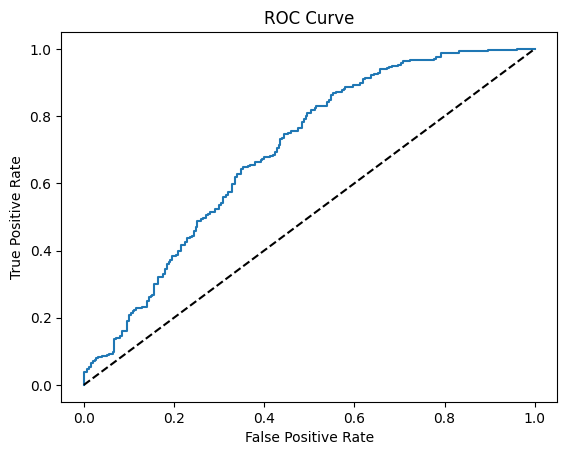

4755 4755 529
len of validation, len of training, X(val) 4517 238 238 [[  0.   0.   0. ...   8.  12.   9.]
 [  0.   0.   0. ...   9.   8.  14.]
 [  0.   0.   0. ...  10.   8.   1.]
 ...
 [  0.   0.   0. ...   4.  20. 131.]
 [  0.   0.   0. ...   2.  18. 167.]
 [  0.   0.   0. ...   2.  21. 194.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
38 47
Epoch 1
train_loss : 0.6947006583213806 val_loss : 0.6937650243441263
train_accuracy : 46.63865546218487 val_accuracy : 45.55765595463138
val_precision : 44.70588235294118
Validation loss decreased (inf --> 0.693765).  Saving model ...
95 83
Epoch 2
train_loss : 0.6916152238845825 val_loss : 0.6930615504582723
train_accuracy : 51.68067226890757 val_accuracy : 49.52741020793951
val_precision : 53.37078651685393
Validation loss decr

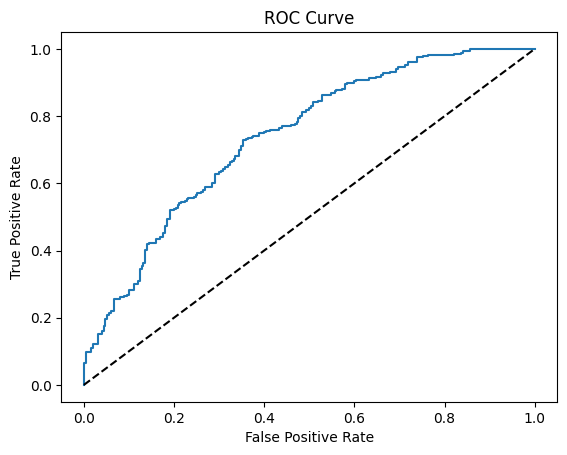

4755 4755 529
len of validation, len of training, X(val) 4517 238 238 [[  0.   0.   0. ...   9.   8.   8.]
 [  0.   0.   0. ...   9.  18.  10.]
 [  0.   0.   0. ...  11.   8.  18.]
 ...
 [  0.   0.   0. ...   2.  21. 131.]
 [  0.   0.   0. ...   1.  13. 118.]
 [  0.   0.   0. ...   1.  10.  18.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
247 206
Epoch 1
train_loss : 0.6911220699548721 val_loss : 0.6923194660080804
train_accuracy : 56.72268907563025 val_accuracy : 55.009451795841215
val_precision : 54.52538631346579
Validation loss decreased (inf --> 0.692319).  Saving model ...
253 208
Epoch 2
train_loss : 0.6917906254529953 val_loss : 0.6920997831556532
train_accuracy : 49.57983193277311 val_accuracy : 55.765595463138
val_precision : 54.880694143167034
Validation loss 

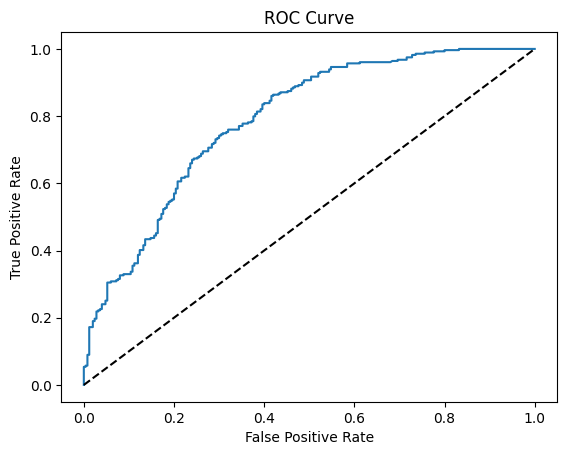

4755 4755 529
len of validation, len of training, X(val) 4517 238 238 [[  0.   0.   0. ...  10.   6.   0.]
 [  0.   0.   0. ...  10.   9.   1.]
 [  0.   0.   0. ...   9.   5.   4.]
 ...
 [  0.   0.   0. ...   1.  16.  14.]
 [  0.   0.   0. ...   1.  21. 185.]
 [  0.   0.   0. ...   1.  19. 169.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
0 0
sum zero
Epoch 1
train_loss : 0.6969194114208221 val_loss : 0.695396727985806
train_accuracy : 46.21848739495798 val_accuracy : 47.25897920604915
val_precision : 0
Validation loss decreased (inf --> 0.695397).  Saving model ...
0 0
sum zero
Epoch 2
train_loss : 0.6965344250202179 val_loss : 0.6940917836295234
train_accuracy : 44.11764705882353 val_accuracy : 47.25897920604915
val_precision : 0
Validation loss decreased (0.695397 -->

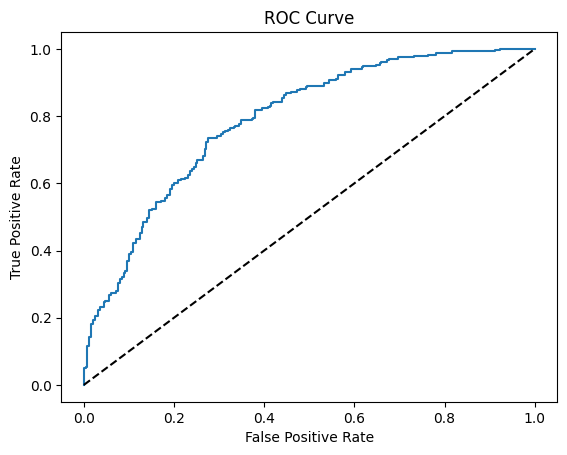

4756 4756 528
len of validation, len of training, X(val) 4518 238 238 [[  0.   0.   0. ...   9.   7.   4.]
 [  0.   0.   0. ...  10.   7.  17.]
 [  0.   0.   0. ...  10.   9.   1.]
 ...
 [  0.   0.   0. ...   4.  21. 189.]
 [  0.   0.   0. ...   1.  18. 167.]
 [  0.   0.   0. ...   1.  23. 194.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
279 249
Epoch 1
train_loss : 0.6925125122070312 val_loss : 0.6913610630565219
train_accuracy : 53.36134453781513 val_accuracy : 52.84090909090909
val_precision : 52.84090909090909
Validation loss decreased (inf --> 0.691361).  Saving model ...
279 249
Epoch 2
train_loss : 0.6908651888370514 val_loss : 0.690920869509379
train_accuracy : 52.52100840336135 val_accuracy : 52.84090909090909
val_precision : 52.84090909090909
Validation loss d

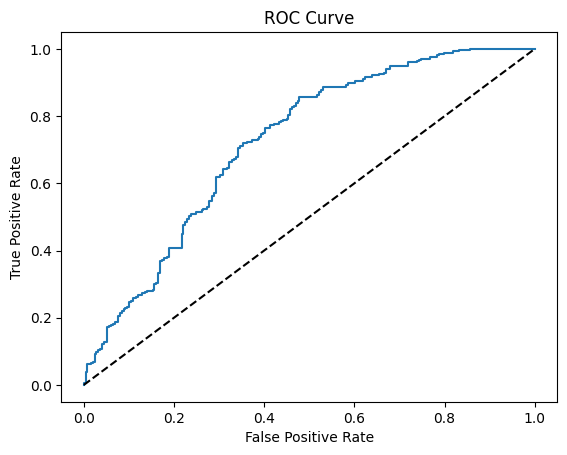

4756 4756 528
len of validation, len of training, X(val) 4518 238 238 [[  0.   0.   0. ...   4.  10.   2.]
 [  0.   0.   0. ...   4.   5.  12.]
 [  0.   0.   0. ...   9.  12.  16.]
 ...
 [  0.   0.   0. ...   1.  11.   3.]
 [  0.   0.   0. ...   1.  12.  53.]
 [  0.   0.   0. ...   5.  16. 113.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
0 0
sum zero
Epoch 1
train_loss : 0.7053001523017883 val_loss : 0.6964558760325114
train_accuracy : 39.91596638655462 val_accuracy : 47.159090909090914
val_precision : 0
Validation loss decreased (inf --> 0.696456).  Saving model ...
0 0
sum zero
Epoch 2
train_loss : 0.6999632567167282 val_loss : 0.6948541800181071
train_accuracy : 44.957983193277315 val_accuracy : 47.159090909090914
val_precision : 0
Validation loss decreased (0.696456

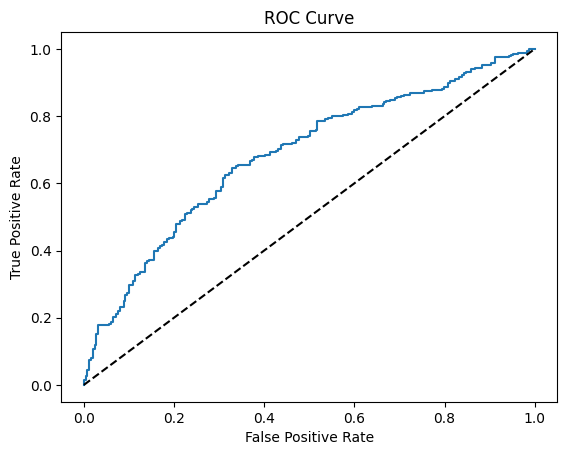

4756 4756 528
len of validation, len of training, X(val) 4518 238 238 [[  0.   0.   0. ...   9.   7.   6.]
 [  0.   0.   0. ...   7.  15.  15.]
 [  0.   0.   0. ...  10.   2.  13.]
 ...
 [  0.   0.   0. ...   5.  27. 194.]
 [  0.   0.   0. ...   4.  18. 194.]
 [  0.   0.   0. ...   1.  22. 174.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
279 249
Epoch 1
train_loss : 0.690567284822464 val_loss : 0.690174420674642
train_accuracy : 54.621848739495796 val_accuracy : 52.84090909090909
val_precision : 52.84090909090909
Validation loss decreased (inf --> 0.690174).  Saving model ...
279 249
Epoch 2
train_loss : 0.687486857175827 val_loss : 0.6892112361060249
train_accuracy : 54.621848739495796 val_accuracy : 52.84090909090909
val_precision : 52.84090909090909
Validation loss d

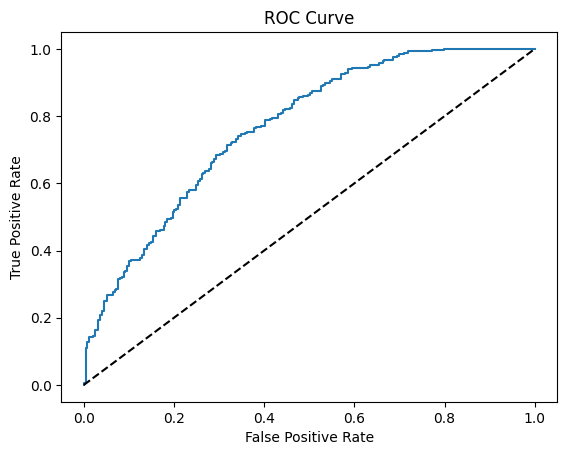

4756 4756 528
len of validation, len of training, X(val) 4518 238 238 [[  0.   0.   0. ...   9.   8.   6.]
 [  0.   0.   0. ...   9.   5.   7.]
 [  0.   0.   0. ...   9.   6.   4.]
 ...
 [  0.   0.   0. ...   2.  21. 185.]
 [  0.   0.   0. ...   4.  21. 167.]
 [  0.   0.   0. ...   1.  20. 104.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
279 249
Epoch 1
train_loss : 0.6961160898208618 val_loss : 0.6920392778184679
train_accuracy : 48.319327731092436 val_accuracy : 52.84090909090909
val_precision : 52.84090909090909
Validation loss decreased (inf --> 0.692039).  Saving model ...
279 249
Epoch 2
train_loss : 0.6965728849172592 val_loss : 0.6898247930738661
train_accuracy : 51.68067226890757 val_accuracy : 52.84090909090909
val_precision : 52.84090909090909
Validation loss

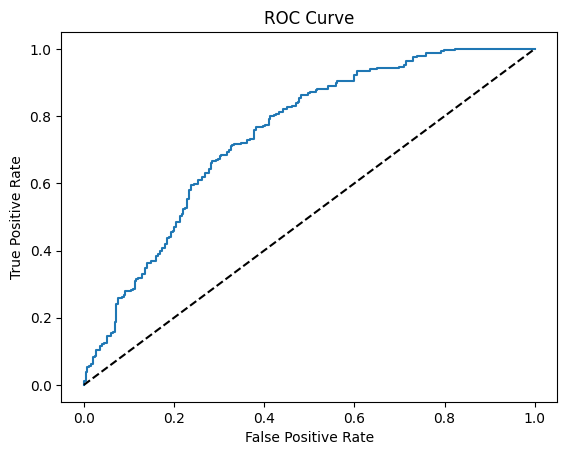

4756 4756 528
len of validation, len of training, X(val) 4518 238 238 [[  0.   0.   0. ...  10.  10.   0.]
 [  0.   0.   0. ...  11.   7.   1.]
 [  0.   0.   0. ...   8.   7.   3.]
 ...
 [  0.   0.   0. ...   3.  28. 194.]
 [  0.   0.   0. ...   1.  22. 195.]
 [  0.   0.   0. ...   1.  10.  67.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
232 215
Epoch 1
train_loss : 0.6940594166517258 val_loss : 0.693531850973765
train_accuracy : 49.159663865546214 val_accuracy : 50.378787878787875
val_precision : 51.90156599552572
Validation loss decreased (inf --> 0.693532).  Saving model ...
269 240
Epoch 2
train_loss : 0.6938770264387131 val_loss : 0.6930373973316617
train_accuracy : 52.10084033613446 val_accuracy : 52.65151515151515
val_precision : 52.848722986247544
Validation los

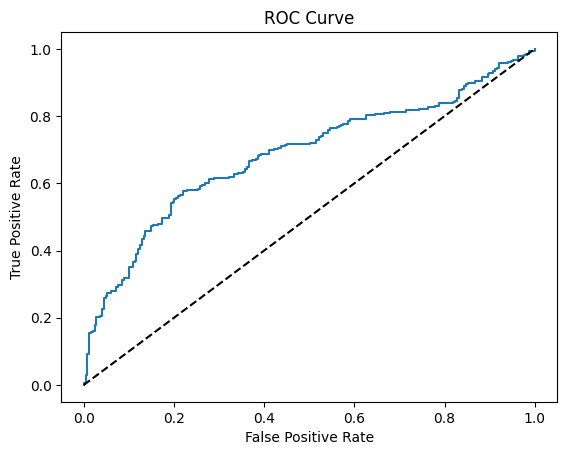

4756 4756 528
len of validation, len of training, X(val) 4518 238 238 [[  0.   0.   0. ...   2.   7.   5.]
 [  0.   0.   0. ...   8.   6.   3.]
 [  0.   0.   0. ...   2.   9.  20.]
 ...
 [  0.   0.   0. ...   1.  18.  78.]
 [  0.   0.   0. ...   5.  20.  94.]
 [  0.   0.   0. ...   3.  19. 130.]]
SentimentRNN(
  (embedding): Embedding(2979, 4)
  (embedding_driv): Embedding(196, 2)
  (lstm): LSTM(5, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)
279 249
Epoch 1
train_loss : 0.6845142990350723 val_loss : 0.6915179093678793
train_accuracy : 56.72268907563025 val_accuracy : 52.84090909090909
val_precision : 52.84090909090909
Validation loss decreased (inf --> 0.691518).  Saving model ...
279 249
Epoch 2
train_loss : 0.6818231642246246 val_loss : 0.6897083388434516
train_accuracy : 59.2436974789916 val_accuracy : 52.84090909090909
val_precision : 52.84090909090909
Validation loss d

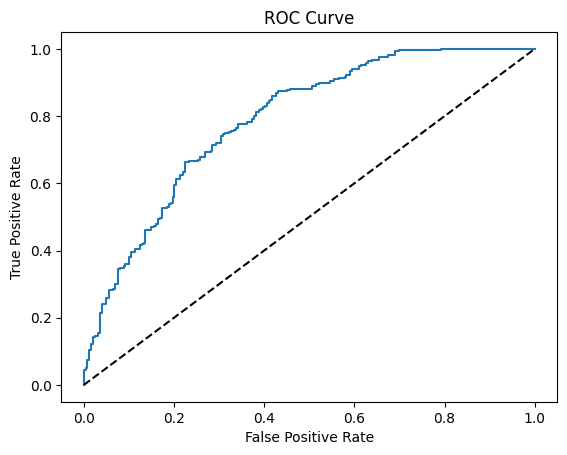

acc: 0.6733434295698001
precision: 0.6693113313964127
recall: 0.7724014336917562
f1: 0.7134149986421189
roc_auc: 0.7399260842653769
average_precision: 0.7414830756003442


In [47]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =StratifiedKFold(n_splits=10, shuffle=True, random_state=seed_value)

# indices = np.arange(X.shape[0])
# np.random.shuffle(indices)
# X = X[indices]
# y = y[indices]

stats = []
# split()  method generate indices to split data into training and test set
print(len(X))
len_art = len(artificial_planned_routes)

#regular k_folding
# for train_index, test_index in kf.split(X, y):
#     X_train, X_val = X[train_index], X[test_index]
#     y_train, y_val = y[train_index], y[test_index]
#
#     indices = np.arange(X_train.shape[0])
#     np.random.shuffle(indices)
#     X_train_shuffled = X_train[indices]
#     y_train_shuffled = y_train[indices]
#
#     train_loader, valid_loader = get_data_loaders(X_train_shuffled, y_train_shuffled, X_val, y_val)
#     print('len of validation, len of training, X(val)', len(X_val), len(X_train), X_val)
#     model = get_model()
#     # summary(model, input_size=(1,9))
#     model.train()
#
#     train_model((train_loader, valid_loader), model, epochs=20)
#     stats.append(get_stats(model, valid_loader))

#with reserving some routes
#Split data into training and testing sets, excluding artificial data from testing

# for train_idx, test_idx in kf.split(X[:-len_art], y[:-len_art]):
for train_idx, test_idx in kf.split(X, y):
    X_train, X_val = X[train_idx], X[test_idx]
    y_train, y_val = y[train_idx], y[test_idx]

    # Append artificial data to training set
    # X_train = np.concatenate((X_train, X[-len_art:]), axis=0)
    # y_train = np.concatenate((y_train, y[-len_art:]), axis=0)

    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    print(len(X_train_shuffled), len(y_train_shuffled), len(X_val))

    len_subset = int(0.95 * len(X_train_shuffled))
    x_subset = X_train_shuffled[:-len_subset]
    y_subset = y_train_shuffled[:-len_subset]
    train_loader, valid_loader = get_data_loaders(x_subset,y_subset, X_val, y_val)

    print('len of validation, len of training, X(val)', len_subset, len(x_subset), len(y_subset), X_val)

    model = get_model()
    model.train()

    train_model((train_loader, valid_loader), model, epochs=30)
    stats.append(get_stats(model, valid_loader))

def get_mean_stat(stats, stat_name) -> float:
    return np.array([item[stat_name] for item in stats]).mean()

print('acc:', get_mean_stat(stats, 'acc'))
print('precision:', get_mean_stat(stats, 'precision'))
print('recall:', get_mean_stat(stats, 'recall'))
print('f1:', get_mean_stat(stats, 'f1'))
print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
print('average_precision:', get_mean_stat(stats, 'average_precision'))

In [ ]:
from sklearn.model_selection import train_test_split

reset_random()
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=seed_value)
train_loader, valid_loader = get_data_loaders(X_train, y_train, X_val, y_val)

model = get_model()
# summary(model, input_size=(1,9))
model.train()

train_model((train_loader, valid_loader), model, epochs=50)

get_stats(model, valid_loader)

In [ ]:
get_stats(model, train_loader)
# def get_mean_stat(stats, stat_name) -> float:
#     return np.array([item[stat_name] for item in stats]).mean()
#
# print('acc:', get_mean_stat(stats, 'acc'))
# print('precision:', get_mean_stat(stats, 'precision'))
# print('recall:', get_mean_stat(stats, 'recall'))
# print('f1:', get_mean_stat(stats, 'f1'))
# print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
# print('average_precision:', get_mean_stat(stats, 'average_precision'))

In [ ]:
kf.split(X, y)